## Adding Rician noise to simulated data

This scripts defines the rician noise and add it to simulated data

/var/folders/gd/mgk6_hls4dx8f77fjjb2b6980000gn/T/ipykernel_64672/3577353637.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


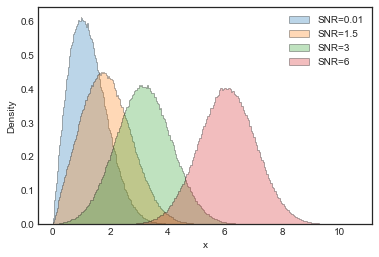

In [2]:
#Plotting and demonstrating the levels of Rician noise

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rice

plt.style.use('seaborn-white')
plt.rcParams["figure.dpi"] = 300

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=200, ec="k")

plt.hist(rice.rvs(0.01,size = 1000000),label='SNR=0.01', **kwargs)
plt.hist(rice.rvs(1.5,size = 1000000), **kwargs,label='SNR=1.5')
plt.hist(rice.rvs(3,size = 1000000), **kwargs,label='SNR=3')
plt.hist(rice.rvs(6,size = 1000000), **kwargs,label='SNR=6')
plt.legend(['SNR=0.01','SNR=1.5','SNR=3','SNR=6'])

plt.xlabel('x')
plt.ylabel('Density')

plt.show()



In [ ]:
def rician_noise(signal,bvalues,TE=80):
    """

    Adds rician noise to MRI signals based on given b-values and TE. 
    Returns the raw noise and image with noise.

    args:   array with signal values from simulated diffusion mri
            b-values for the corresponding signal values
            TE for the corresponding signal values. Defaults to 80ms

    """

    scale = 5e-8*np.sqrt(bvalues)*(TE/30)**2

    rician_noise = rice.rvs(0.8,scale=scale,size = signal.shape)
    rician_image = signal*(1-rician_noise)

    return rician_noise, rician_image



Loading simulated data with scheme, and applying the rician noise.

In [ ]:
from dmipy.core.acquisition_scheme import acquisition_scheme_from_schemefile

simulated_signal = np.load("simulated_signal.npy")
scheme =acquisition_scheme_from_schemefile("acq.csheme")

_,noisy_signal= rician_noise(simulated_signal,bvalues=scheme.bvalues)

## Visualization

In [ ]:
import dipy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
real_image = dipy.data.fetcher.load_nifti_data(join(acquisition_path_GS55,"GS55_all.nii.gz"))
noise, noisy_real_img = rician_noise(real_image[:,:,:,0],200,3000)

fig, ax = plt.subplots(2,2,constrained_layout=True,figsize=(7,7))
fig.suptitle('Rician noise voxel distribution',fontsize=20)

ax=ax.flat
image = ax[0].imshow(real_image[:, :, 15, 0])
rect = patches.Rectangle((155,125),10,10,linewidth=1,edgecolor='r',facecolor='none')
ax[0].add_patch(rect)
ax[0].set_axis_off()
ax[0].set_title('(a) In Vivo MRI ')

image = ax[1].imshow(noisy_real_img[:, :, 15])
rect = patches.Rectangle((155,125),10,10,linewidth=1,edgecolor='r',facecolor='none')
ax[1].add_patch(rect)
ax[1].set_axis_off()
ax[1].set_title('(b) In Vivo MRI with Rician noise')


ax[2].hist(real_image[155:165,125:135,12,0].flatten(), density=True, histtype='stepfilled', alpha=0.2)
ax[2].set_title('(c) Voxel distribution in air for MRI')
ax[2].set_xlim([1000,4000])
ax[2].set_xlabel('Voxel intensity')
ax[2].set_ylabel('Density')


ax[3].hist(noisy_real_img[155:165,125:135,0].flatten(), density=True, histtype='stepfilled', alpha=0.2)
ax[3].set_title('(d) Voxel distribution in air for MRI with Rician noise')
ax[3].set_xlabel('Voxel intensity')
ax[3].set_ylabel('Density')
